In [1]:
DICOM_FOLDER = '../../data/DeepStrain_Shared_Folder/20210209/20210209_1251_P2018P00292_21_CINE_DEEPSTRAIN_bay7/'

In [2]:
from data import dicom_dataset
from data.base_dataset import BaseDataset, Transforms
from data.image_folder import make_dataset


In [3]:
class Options():
    
    def __init__(self):
        
        self.dataroot = '../../data/DeepStrain_Shared_Folder/20210212'
        self.max_dataset_size = float("inf")
        
opt = Options()

In [4]:
filenames = sorted(make_dataset(opt.dataroot, opt.max_dataset_size, 'DICOM'))

In [9]:
import pandas as pd
import pydicom

In [10]:
metadata = {'FileName':[],
            'PatientName':[], 
            'SeriesInstanceUID':[], 
            'StudyInstanceUID':[], 
            'ProtocolName':[], 
            'TriggerTime':[], 
            'InstanceNumber':[], 
            'ImageOrientationPatient':[],  
            'ImagePositionPatient':[],
            'SliceLocation':[], 
            'PixelSpacing':[], 
            'SliceThickness':[], 
            'AcquisitionInstanceUID':[], 
            'SliceInstanceUID':[]}

for filename in filenames:
    dicom = pydicom.read_file(filename)

    metadata['FileName']                += [filename]
    metadata['PatientName']             += [str(dicom[0x0010, 0x0010].value)]
    metadata['SeriesInstanceUID']       += [dicom.SeriesInstanceUID]
    metadata['StudyInstanceUID']        += [dicom.StudyInstanceUID]
    metadata['ProtocolName']            += [dicom.ProtocolName]
    metadata['TriggerTime']             += [dicom.TriggerTime]
    metadata['InstanceNumber']          += [dicom.InstanceNumber]
    metadata['ImageOrientationPatient'] += [dicom.ImageOrientationPatient]
    metadata['ImagePositionPatient']    += [dicom.ImagePositionPatient]
    metadata['SliceLocation']           += [dicom.SliceLocation]
    metadata['PixelSpacing']            += [dicom.PixelSpacing]
    metadata['SliceThickness']          += [dicom.SliceThickness]

    metadata['AcquisitionInstanceUID']  += [dicom.SeriesInstanceUID.split('.')[-4][8:10]]
    metadata['SliceInstanceUID']        += [dicom.SeriesInstanceUID.split('.')[-3]]

metadata = pd.DataFrame(metadata)

In [ ]:
metadata

In [30]:
dataset = dicom_dataset.DICOMDataset(opt)

Found 1 patient(s):
P2018P00292_21_CINE_DEEPSTRAIN
Found 1 acquisitions(s):
P2018P00292_21_CINE_DEEPSTRAIN_13


In [31]:
nifti = dataset.__getitem__(0)
nifti.to_filename('../private_data/REPEATABILITY/20210209_1251_P2018P00292_21_CINE_DEEPSTRAIN_bay7_V1.nii.gz')

ValueError: operands could not be broadcast together with shapes (170,208) (208,170) (170,208) 

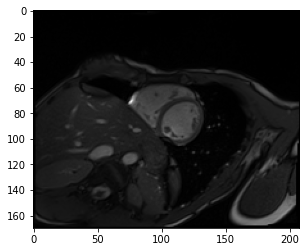

In [11]:
import matplotlib.pylab as plt
import time
from IPython import display

for t in range(25):
    plt.imshow(nifti.get_fdata()[:,:,8,t], cmap='gray')
    time.sleep(0.1)
    display.clear_output(wait=True)
    plt.show()